# Install and Setup Qiskit

In [1]:
import qiskit

Check qiskit version

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': '0.7.0',
 'qiskit': '0.19.1'}

In [3]:
from qiskit import IBMQ

In [5]:
# Get your ibm token with steps from README and save in a secure location
ibm_token_file = 'secure/ibm_load_account.txt'
with open(ibm_token_file) as token_file:
    token = token_file.readline()

In [6]:
IBMQ.save_account(token)

In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Hello World

In [8]:
from qiskit import *

In [9]:
# Build a 2-qubit quantum register
quantum_register = QuantumRegister(2)

In [10]:
# Build a 2 classical bit classical register to take measurements from quantum bits
classical_register = ClassicalRegister(2)

In [11]:
# Build a circuit using the above
circuit = QuantumCircuit(quantum_register, classical_register)

In [12]:
# Draw / visualize the circuit
%matplotlib inline

In [13]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

In order to create entanglement, apply the **Hadamard gate** on the first qubit.

In [14]:
circuit.h(quantum_register[0])

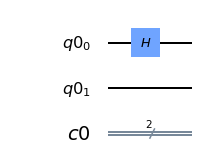

In [15]:
# Visualize the circuit
circuit.draw(output='mpl')

In [16]:
circuit.cx(quantum_register[0], quantum_register[1])

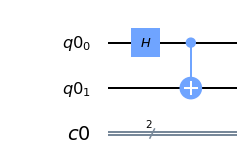

In [17]:
circuit.draw(output="mpl")

In [18]:
circuit.measure(quantum_register, classical_register)

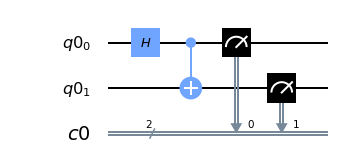

In [19]:
circuit.draw(output = "mpl")

### Run on Simulator

In [20]:
simulator = Aer.get_backend('qasm_simulator')

In [21]:
result = execute(circuit, backend = simulator).result()

In [22]:
from qiskit.tools.visualization import plot_histogram

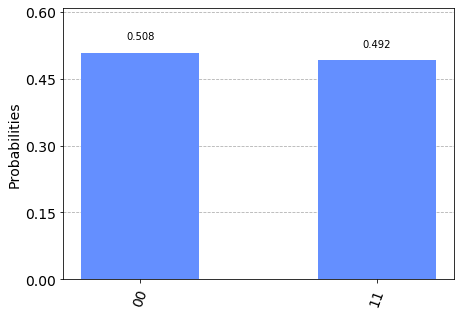

In [23]:
plot_histogram(result.get_counts(circuit))

### Run on Real IBM Quantum Computer

In [24]:
provider = IBMQ.get_provider('ibm-q')

In [25]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [26]:
job = execute(circuit, backend=qcomp)

In [27]:
from qiskit.tools.monitor import job_monitor

In [28]:
job_monitor(job)

Job Status: job has successfully run


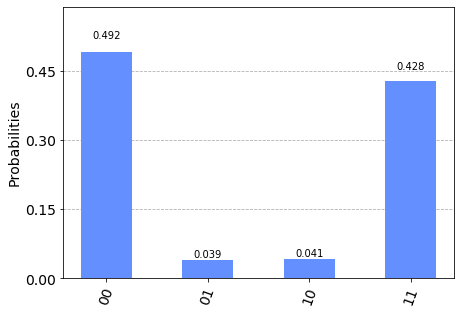

In [29]:
result = job.result()
plot_histogram(result.get_counts(circuit))

# Building Blocks of Quantum Circuits - Overview of Gates

In [30]:
from qiskit import *

In [31]:
from qiskit.tools.visualization import plot_bloch_multivector

In [32]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)

In [33]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


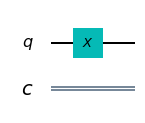

In [34]:
circuit.draw(output='mpl')

### Bloch sphere

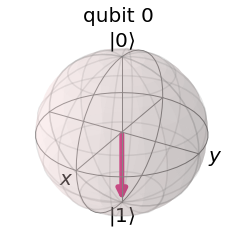

In [35]:
plot_bloch_multivector(statevector)

### Measurement

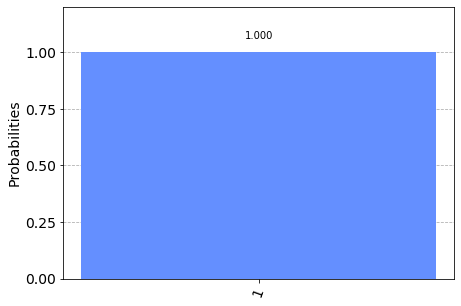

In [36]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots = 1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### Matrix representation of circuit

In [37]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)

simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
